<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis on Text data
Runtime -> Change Runtime Type -> T4 GPU

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [3]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Step 2 - Text Preprocessing

In [4]:
st = "Wow... Loved this place"
print(st)

Wow... Loved this place


In [5]:
# convert text to lower case
st = st.lower()
print(st)

wow... loved this place


In [6]:
# Remove the punctuation marks
# \w - any word (a-z0-9)
# \s - spaces or new line
# [] - is group of characters
# ^ - not
import re

clean_st = re.sub(r"[^\w\s]", "", st)
print(clean_st)

wow loved this place


In [7]:
import re

def clean_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^\w\s]", "", text)
  text = text.strip()
  return text

In [8]:
clean_text("Wow... Loved this place.	")

'wow loved this place'

In [9]:
df["clean"] = df["Review"].apply(clean_text)
df.head()

,Review,Liked,clean
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...


# Preprocess the text
TFIDF -> SVD - Latent Semantic Analysis

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(df["clean"])

TfidfVectorizer()

In [11]:
X_pre = tfidf.transform(df["clean"]).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X_pre.shape

(1000, 2067)

# SVD - Singular Value decomposition
Dimentionaly Reduction technique -> reduce number of columns

In [13]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_pre)

TruncatedSVD(n_components=300, random_state=42)

In [14]:
X_pre_red = svd.transform(X_pre)
X_pre_red

array([[ 0.11457856,  0.19021733,  0.2986051 , ...,  0.02648712,
        -0.06734526, -0.03547384],
       [ 0.20041515,  0.06219207,  0.10386266, ...,  0.06581803,
        -0.00846123, -0.02620217],
       [ 0.248602  , -0.05947125, -0.09197254, ...,  0.00358452,
         0.01758314,  0.03138264],
       ...,
       [ 0.25745938,  0.21354302, -0.2526886 , ...,  0.01412228,
        -0.01036806,  0.01368249],
       [ 0.21755074,  0.04422346, -0.07900023, ..., -0.00695222,
        -0.00115559, -0.01503182],
       [ 0.22278543,  0.02689928, -0.02221586, ..., -0.01773015,
         0.00117185, -0.02215504]])

In [15]:
X_pre_red.shape

(1000, 300)

In [16]:
Y = df["Liked"]
Y.head()

,Liked
0,1
1,0
2,0
3,1
4,1


In [17]:
# 0 - disliked
# 1 - liked

# Apply Train test split on X_pre_red, Y

In [18]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [19]:
xtrain[0:5]

array([[ 0.22714971, -0.1355275 , -0.05020053, ..., -0.02393192,
        -0.0021589 , -0.04579225],
       [ 0.04699212,  0.01342239,  0.03451729, ..., -0.01682643,
        -0.02258327, -0.05361464],
       [ 0.19705026, -0.13148614, -0.08873097, ...,  0.0163009 ,
         0.03136018, -0.01311047],
       [ 0.09665884,  0.12518787,  0.07087796, ..., -0.04666308,
         0.02675816, -0.01065734],
       [ 0.19396398,  0.00039447, -0.03721158, ...,  0.00462733,
         0.00124036, -0.00446433]])

In [20]:
ytrain[0:5]

,Liked
29,0
535,1
695,0
557,0
836,1


In [21]:
xtest[0:5]

array([[ 0.07691892,  0.13494159, -0.07038311, ..., -0.02458723,
        -0.01471647, -0.00803972],
       [ 0.254266  , -0.0750054 , -0.03373471, ..., -0.01690514,
         0.01117494,  0.01063113],
       [ 0.26574114,  0.01069197,  0.09623242, ...,  0.01213834,
        -0.00209836,  0.01289054],
       [ 0.11599709,  0.00114663,  0.01393244, ...,  0.04943045,
        -0.01832059,  0.02738831],
       [ 0.05883133,  0.01151943, -0.0282649 , ..., -0.00060619,
        -0.01055113,  0.01815853]])

In [22]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


# Build the neural net

In [23]:
xtrain.shape[1]

300

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential(
    [
        Input(shape = (xtrain.shape[1],)),
        Dense(units=128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(units=64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ]
)

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
es = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

In [29]:
hist = model.fit(xtrain, ytrain, validation_split=0.1, epochs=200, callbacks=[es])

Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.4948 - loss: 3.0345 - val_accuracy: 0.5125 - val_loss: 2.2433
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5872 - loss: 2.0468 - val_accuracy: 0.5000 - val_loss: 1.5617
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5822 - loss: 1.4432 - val_accuracy: 0.5375 - val_loss: 1.1677
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5899 - loss: 1.0967 - val_accuracy: 0.5375 - val_loss: 0.9504
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.9043 - val_accuracy: 0.7125 - val_loss: 0.8276
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7935 - loss: 0.7943 - val_accuracy: 0.7375 - val_loss: 0.7606
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7723 - loss: 0.7223 - val_accuracy: 0.7875 - val_loss: 0.7145
Epoch 8/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8420 - loss: 0.6759 - val_accuracy: 0.8250 -

# Plot the learning curve

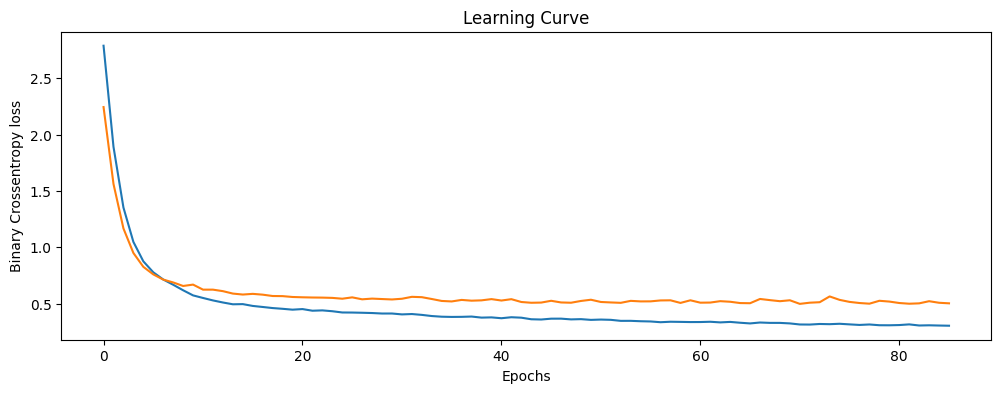

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train loss")
plt.plot(hist.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy loss")
plt.title("Learning Curve")
plt.show()

# Evaluate the model

In [31]:
train_loss, train_acc = model.evaluate(xtrain, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9816 - loss: 0.2983 
Train Loss : 0.3186
Train Accuracy : 0.9688


In [32]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7943 - loss: 0.6599
Test Loss : 0.6339
Test Accuracy : 0.8050


# Confusion Matrix display

In [33]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


array([[0.28273028],
       [0.9792107 ],
       [0.9908902 ],
       [0.9718783 ],
       [0.5665632 ]], dtype=float32)

In [34]:
ytest_pred = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ytest_pred[0:5]

[0, 1, 1, 1, 1]

In [35]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


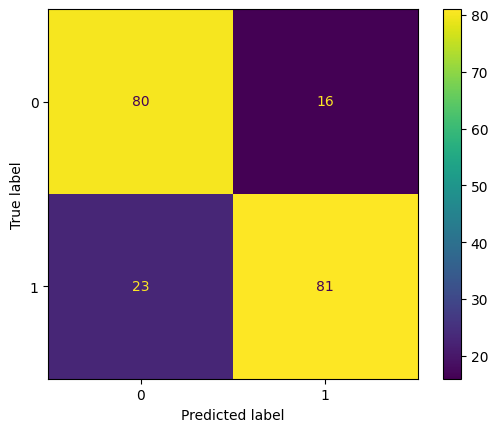

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ytest_pred)

In [40]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ytest_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        96
           1       0.84      0.78      0.81       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.81       200



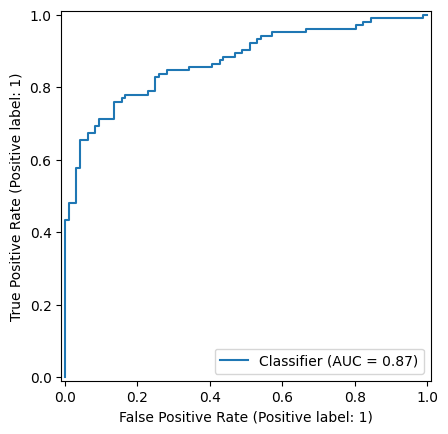

In [41]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

# Above results confirm that this is a good model

# Out of sample prediction

In [42]:
text = "Very Good Resutaurant!  I really liked the ambience ..."
print(text)

Very Good Resutaurant!  I really liked the ambience ...


In [43]:
clean = clean_text(text)
print(clean)

very good resutaurant  i really liked the ambience


In [45]:
xnew = tfidf.transform([clean]).toarray()
xnew

array([[0., 0., 0., ..., 0., 0., 0.]])

In [46]:
xnew_pre = svd.transform(xnew)
xnew_pre

array([[ 0.18585393, -0.10140506,  0.0159861 ,  0.1207402 ,  0.15421532,
         0.22912129,  0.09871833,  0.14065257, -0.06245357, -0.10743242,
        -0.03432607, -0.02974574, -0.099367  , -0.02780148,  0.01702209,
        -0.02859386,  0.00188882, -0.01421018,  0.0320137 , -0.00095543,
         0.0084784 , -0.01534123, -0.0609137 ,  0.02318394, -0.02734224,
         0.00967877, -0.03472486, -0.07483652, -0.07702768, -0.04113909,
        -0.02282745, -0.04223195,  0.13309194,  0.02433832,  0.00515781,
        -0.00274967,  0.13564171,  0.05082262, -0.03597994, -0.00848072,
         0.00379915, -0.04243303, -0.01234389, -0.05141894, -0.01081106,
        -0.01705492,  0.00337452,  0.02469434, -0.04725266, -0.04385756,
        -0.0044786 , -0.05686168, -0.00386761, -0.0914825 ,  0.01787823,
        -0.03805869,  0.02511151, -0.02852473, -0.05067609, -0.00615843,
         0.05991512,  0.02266727,  0.01897386, -0.01799165, -0.04672637,
         0.00591003, -0.01847809,  0.02978463,  0.0

In [47]:
prob = model.predict(xnew_pre)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step


array([[0.94897413]], dtype=float32)

In [48]:
pred = 1 if prob >= 0.5 else 0
print(text)
print(f"Probability : {prob}")
print(f"Prediction : {pred}")

Very Good Resutaurant!  I really liked the ambience ...
Probability : [[0.94897413]]
Prediction : 1


In [53]:
def predict_sentiment(text: str):
  clean = clean_text(text)
  xnew = tfidf.transform([clean]).toarray()
  xnew_pre = svd.transform(xnew)
  probs = model.predict(xnew_pre)
  preds = 1 if probs >= 0.5 else 0
  print(f"Orignal Text : {text}")
  print(f"Clean Text : {clean}")
  print(f"Probability : {probs}")
  print(f"Predictions : {preds}")

In [54]:
text = "I did not like the service, it was too slow! ..."
predict_sentiment(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Orignal Text : I did not like the service, it was too slow! ...
Clean Text : i did not like the service it was too slow
Probability : [[0.00828339]]
Predictions : 0


In [55]:
text = "I read this book the story was really amazing and the plot had impressive turning point"
predict_sentiment(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Orignal Text : I read this book the story was really amazing and the plot had impressive turning point
Clean Text : i read this book the story was really amazing and the plot had impressive turning point
Probability : [[0.87756765]]
Predictions : 1
